<a href="https://colab.research.google.com/github/saneeinia/deep-codes/blob/master/test3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving DLdata2.xlsx to DLdata2.xlsx
User uploaded file "DLdata2.xlsx" with length 17305 bytes


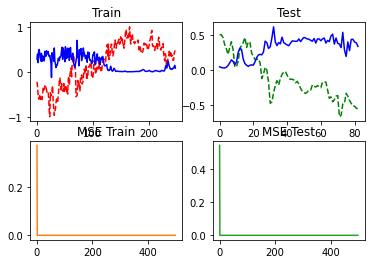

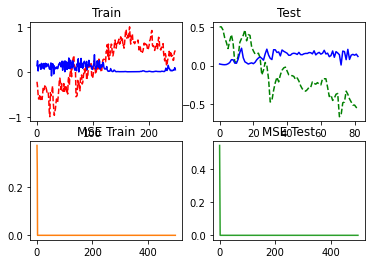

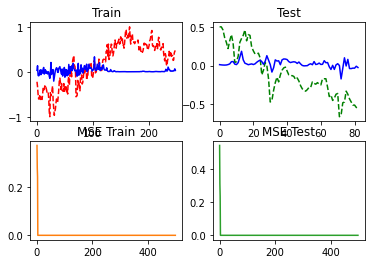

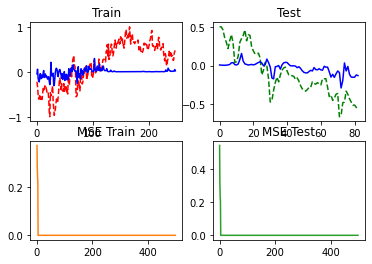

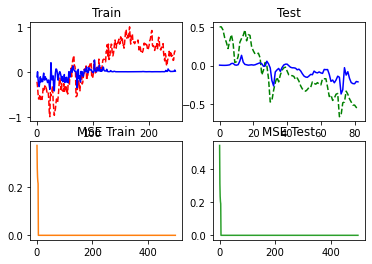

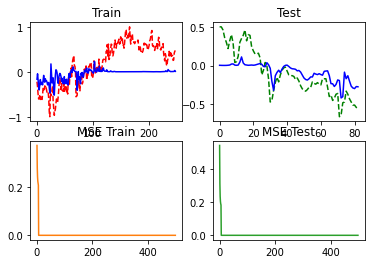

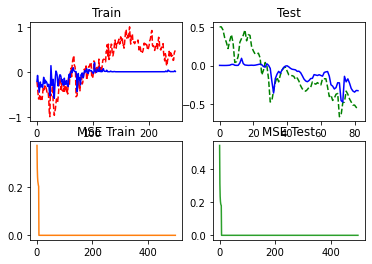

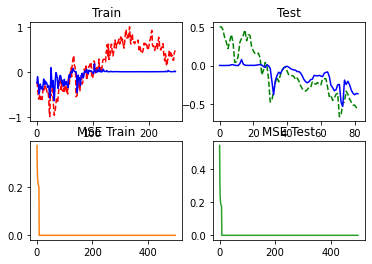

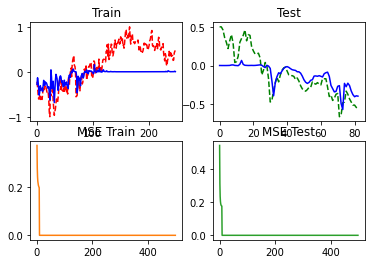

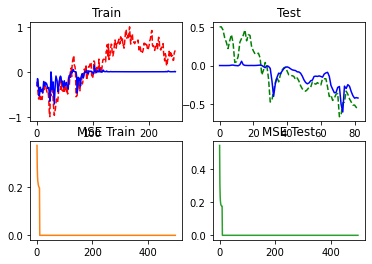

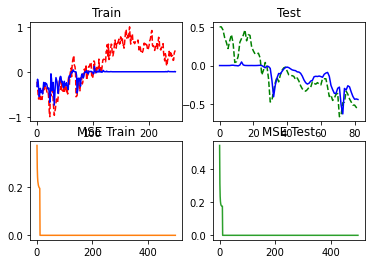

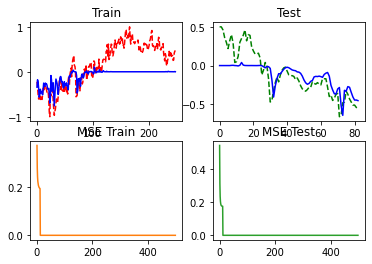

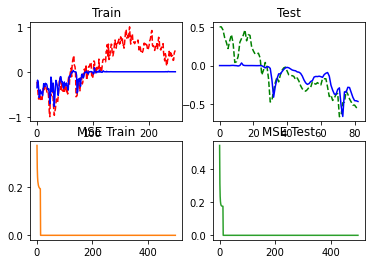

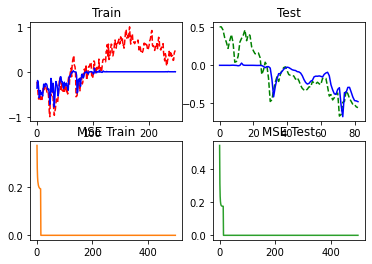

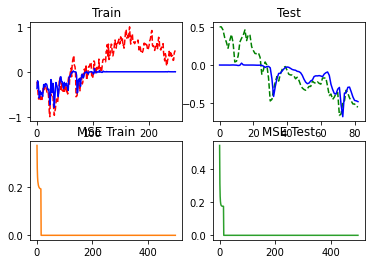

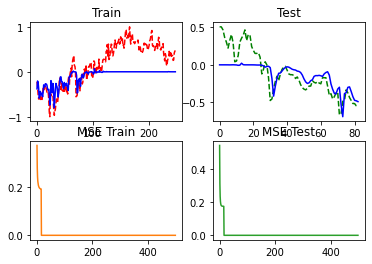

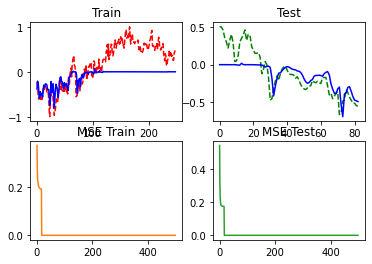

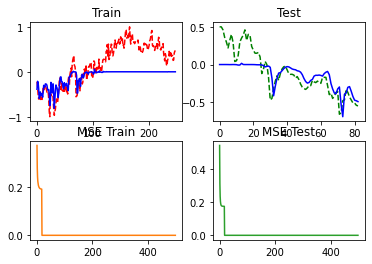

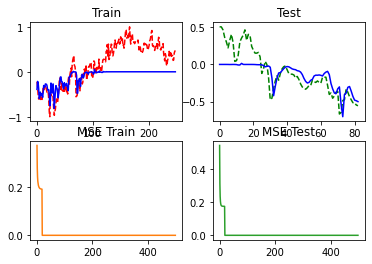

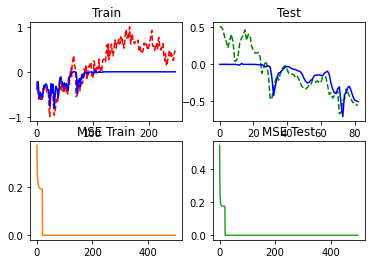

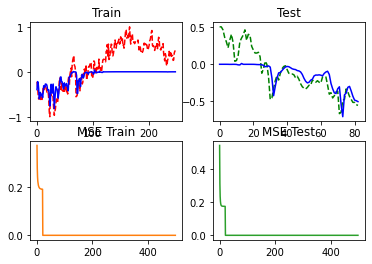

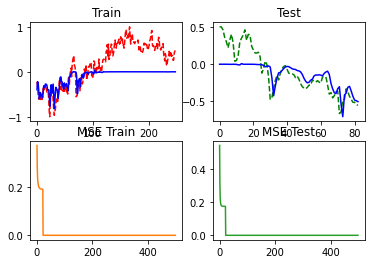

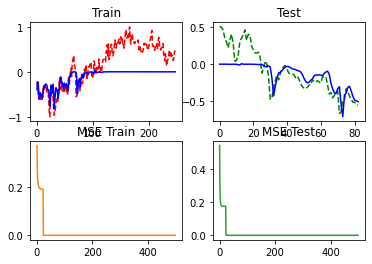

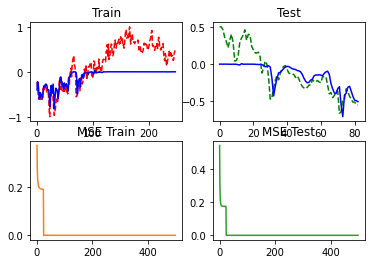

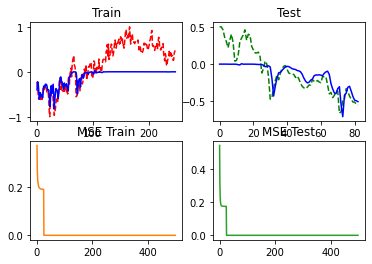

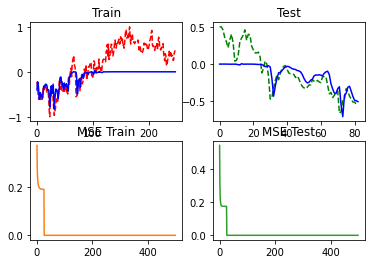

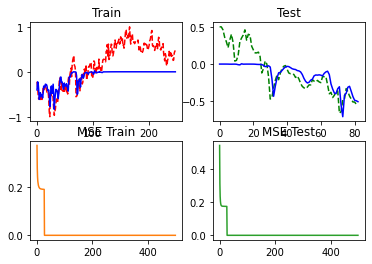

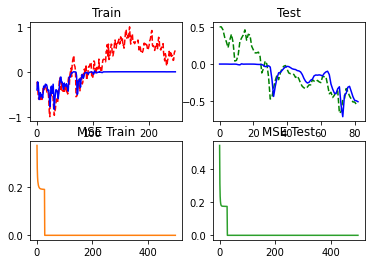

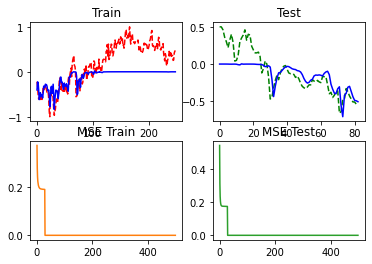

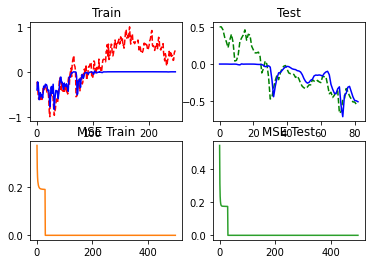

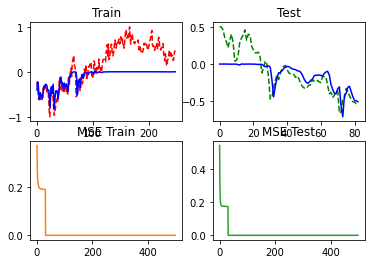

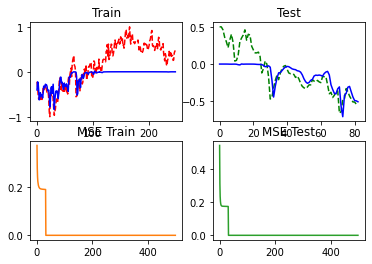

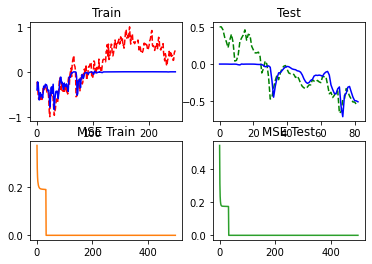

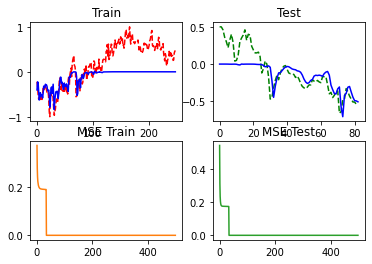

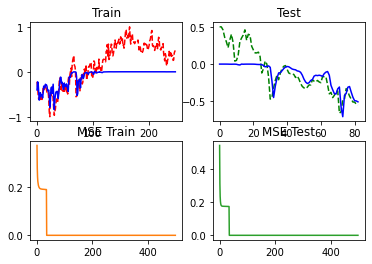

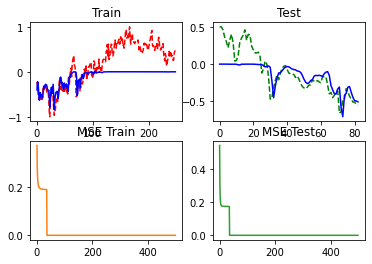

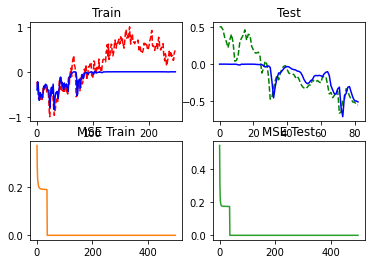

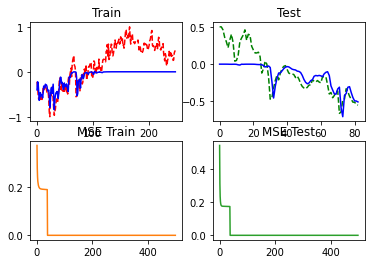

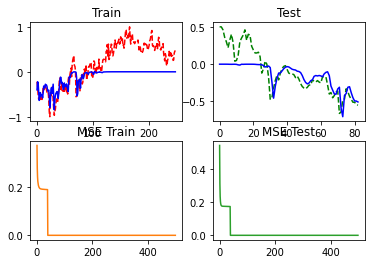

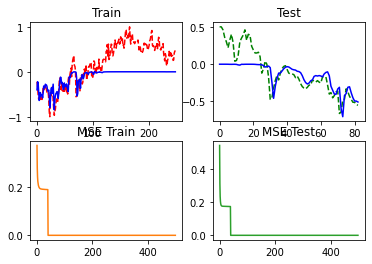

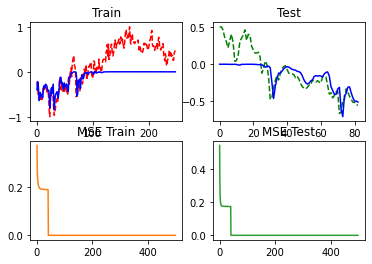

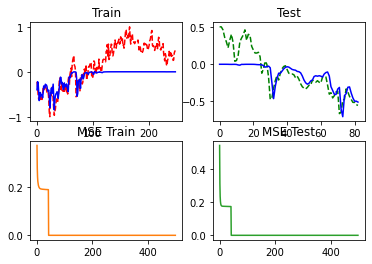

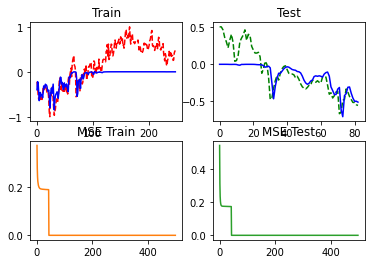

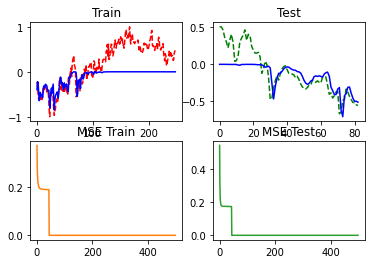

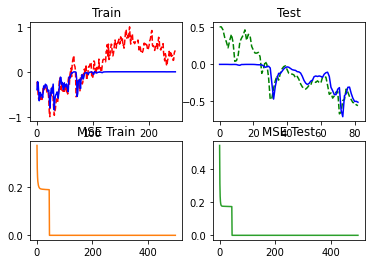

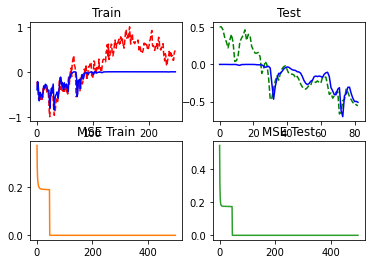

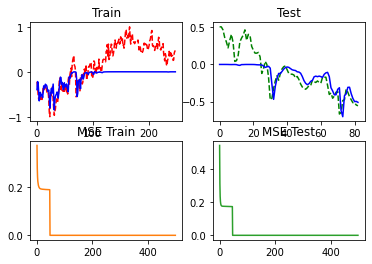

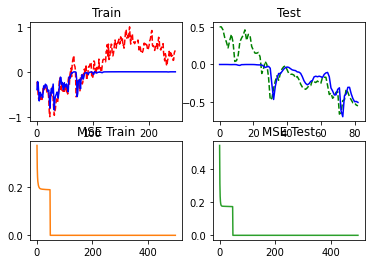

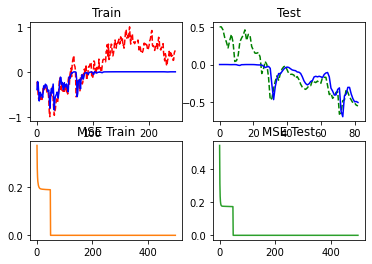

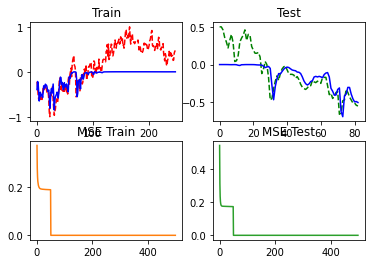

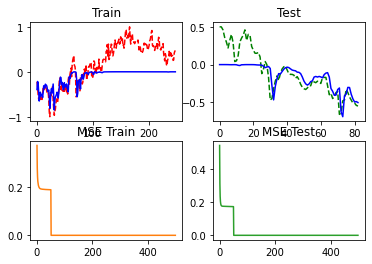

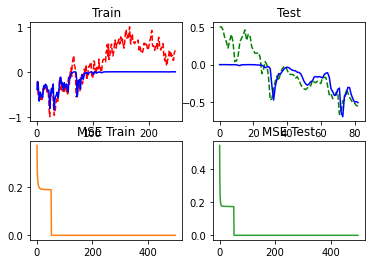

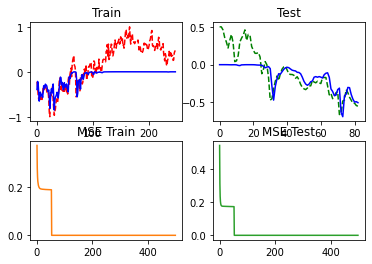

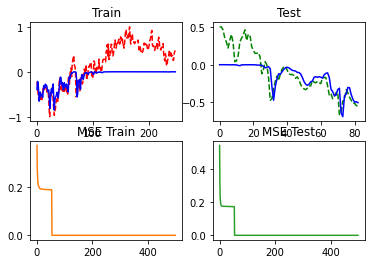

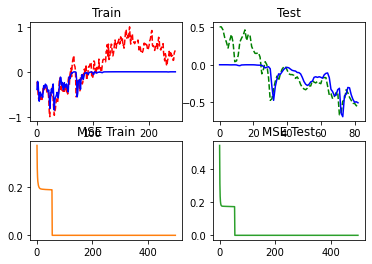

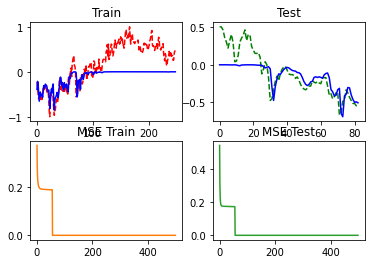

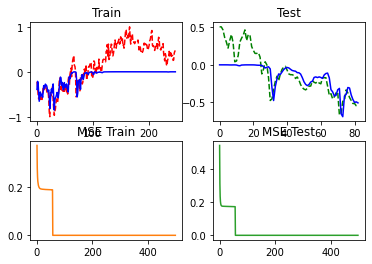

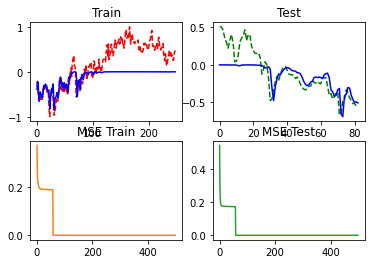

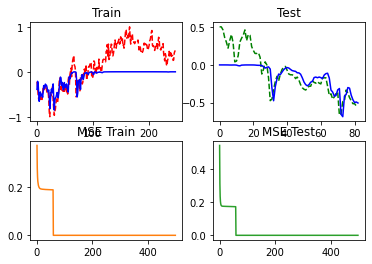

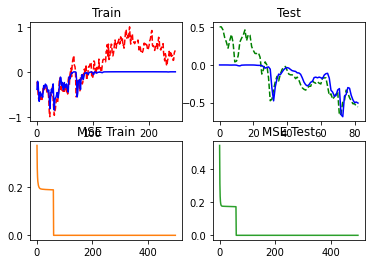

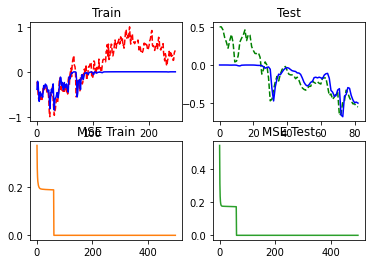

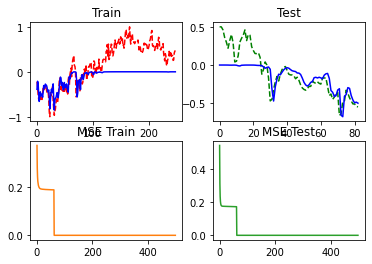

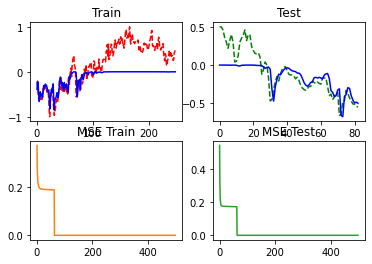

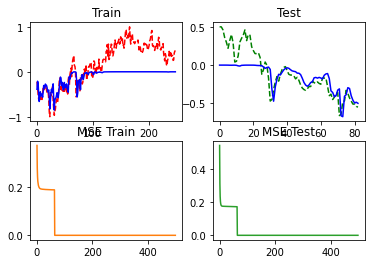

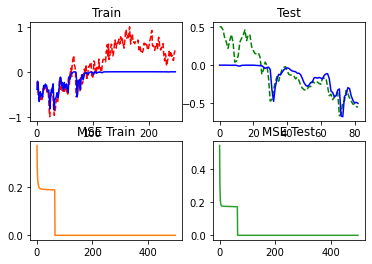

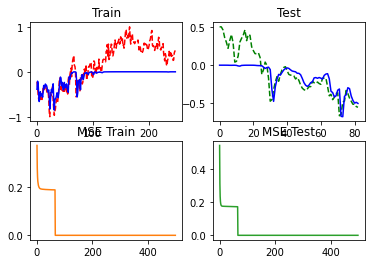

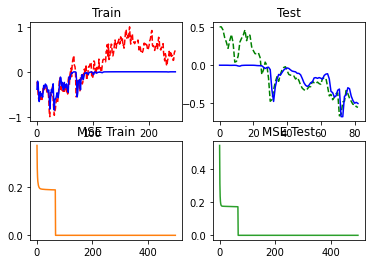

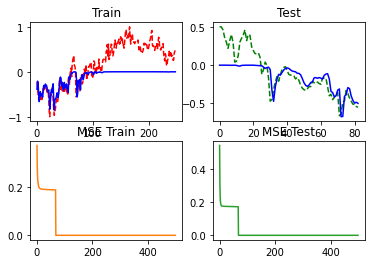

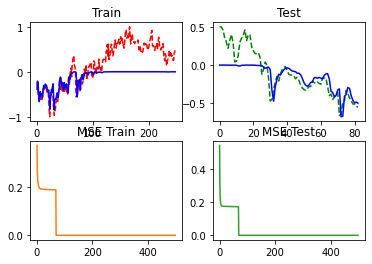

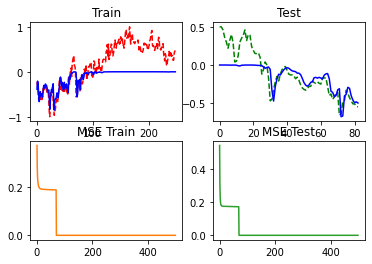

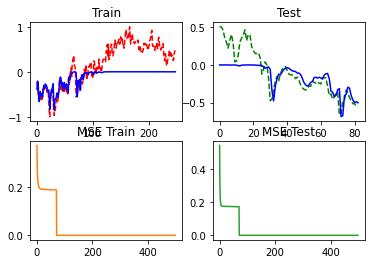

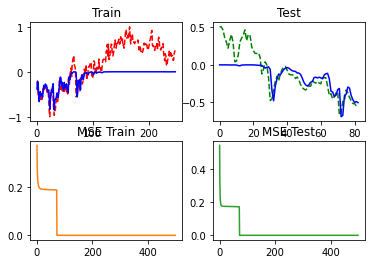

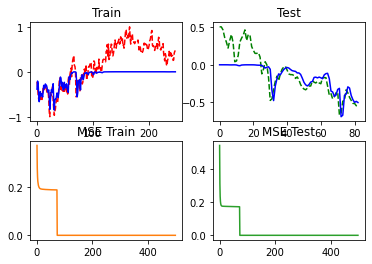

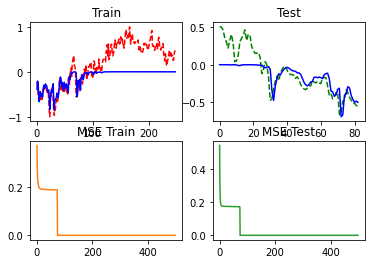

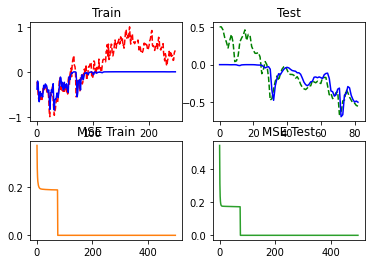

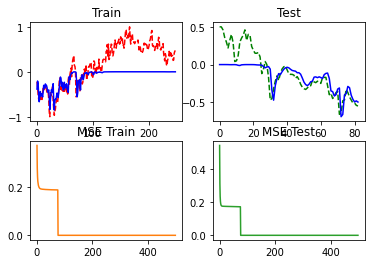

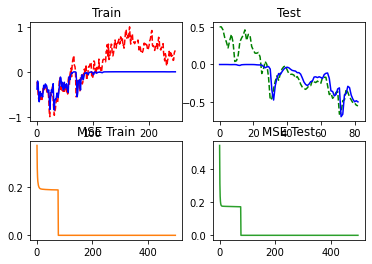

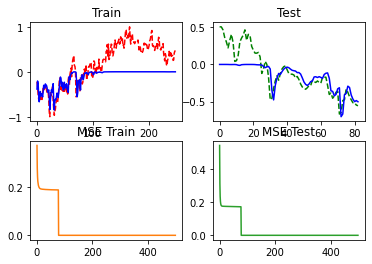

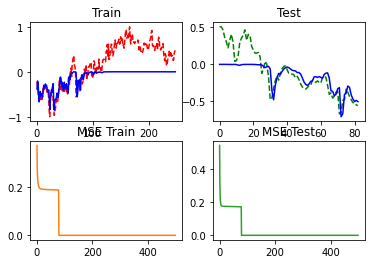

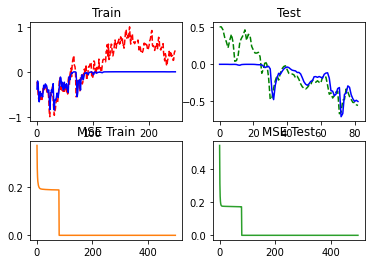

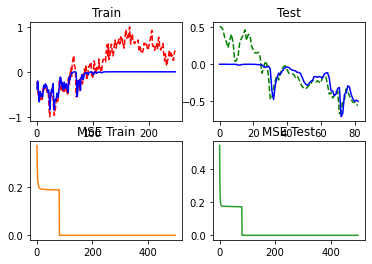

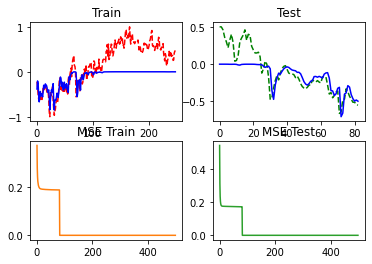

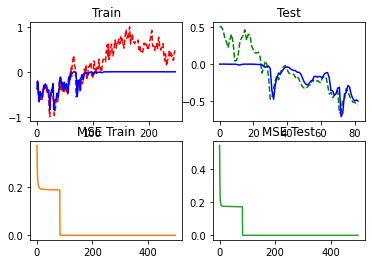

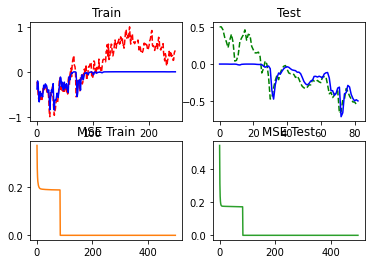

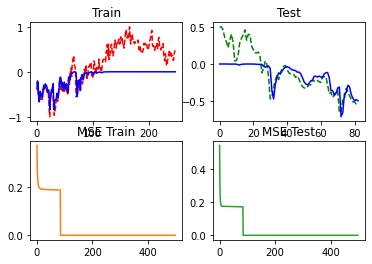

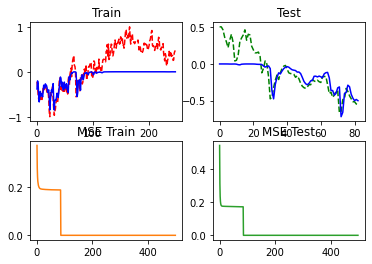

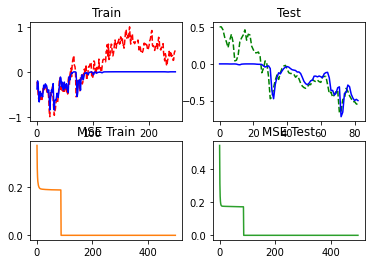

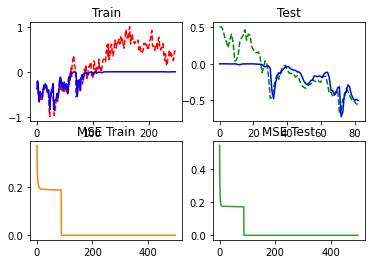

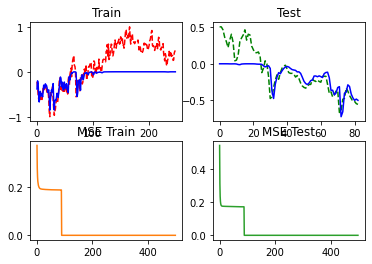

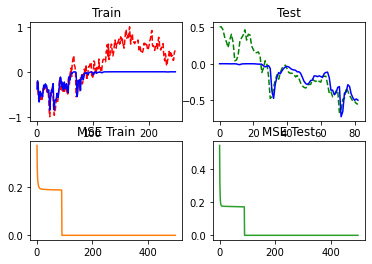

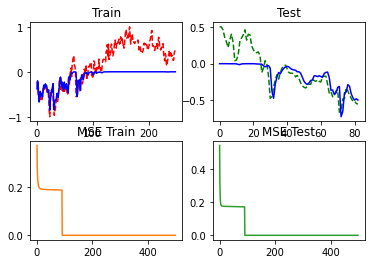

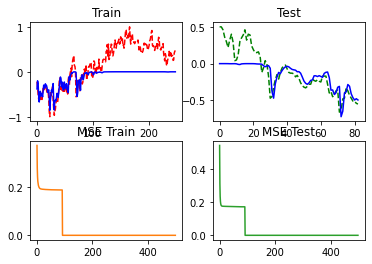

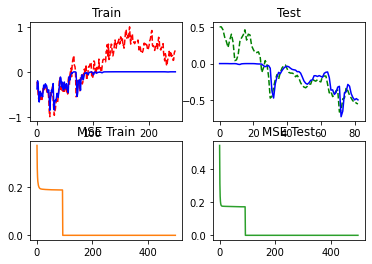

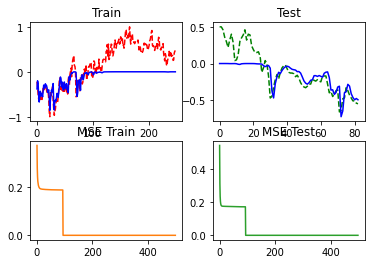

In [0]:
# region library
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
from google.colab import files


# endregion




# region activation functions
def tanh(x):
    return ((math.e**(x)) - (math.e**(-x)))/((math.e**(x)) + (math.e**(-x)))


def tanhPrime(x):
    return 1-(tanh(x)**2)


def sig(x):
    return 1 / (1 + (math.e**(-x)))



def sigPrime(x):
    return sig(x)*(1-sig(x))

def norm2(x,c):
    temp = x-c
    return np.sqrt(np.sum(temp**2))


def rbf(x, c, s):

    return np.exp(-1 / (2 * s**2) * norm2(x, c)**2)



# endregion
# region functions
def myF(x):
    return tanh(x)


def myFPrime(x):
    return tanhPrime(x)


def myMSE(x):
    s = x.shape
    x = x*x
    summ = 0

    for i in range(s[0]):
        summ = summ + x[i, 0]
    return summ/s[0]


def myDiag(x):
    s = x.shape
    out = np.zeros((s[1],s[1]))
    for i in range(s[1]):
        out[i,i] = x[0,i]
    return out



def normaliazation():
    global data
    mini = 1
    maxi = 1
    s= data.shape
    for i in range(s[0]):
        if maxi < data[i, 0]:
            maxi = data[i, 0]

        elif mini > data[i, 0]:
            mini = data[i, 0]
    for i in range(s[0]):
        data[i, 0] = 2*(data[i, 0] - mini) / (maxi - mini) -1

    return 0


def initializeData():
    global m
    global data
    global input_data

    normaliazation()

    for j in range(m):
        for i in range(data.size - m):
            input_data[i, j] = data[i + j, 0]
    # print(input_data)
    # print(input_data.shape)
    return 0
# endregion


# region main code

uploaded=files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))
# region prepare data
data = pd.read_excel('DLdata2.xlsx', header=None)
data = data.to_numpy()
m = 4
train_rate = 0.75
input_data = np.zeros((data.size - m, m))
initializeData()
# endregion

# region initialize  number of neurons in each layer
numberOfData = input_data.shape[0]
numberOfInput = m-1
numberOfNeuronsInSecondLayer = 4
numberOfNeuronsInSixthLayer = 4
numberOfOutput = 1
numOfTrain = round(numberOfData*train_rate)
numOfTest = numberOfData-numOfTrain
# endregion

# region initialize weights

loww = -1
highh = 1


w1 = np.random.uniform(loww, highh, (numberOfNeuronsInSecondLayer, numberOfInput))
net1 = np.zeros((1, numberOfNeuronsInSecondLayer))
o1 = np.zeros((1, numberOfNeuronsInSecondLayer))


net = np.zeros((1, numberOfNeuronsInSixthLayer))

w = np.random.uniform(loww, highh, (numberOfNeuronsInSixthLayer, numberOfNeuronsInSecondLayer))
o = np.zeros((1, numberOfNeuronsInSixthLayer))

w6 = np.random.uniform(loww, highh, (numberOfOutput, numberOfNeuronsInSixthLayer))
net6 =np.zeros((1, numberOfOutput))
o6 = np.zeros((1, numberOfOutput))

# endregion

# region variables

eta = 0.1
etac = 0.1
etasigma = 0.1

maxOfEpoch = 500
train_error = np.zeros((numOfTrain, 1))
test_error = np.zeros((numOfTest, 1))
output_train = np.zeros((numOfTrain, 1))
output_test = np.zeros((numOfTest, 1))

mse_train = np.zeros((maxOfEpoch, 1))
mse_test = np.zeros((maxOfEpoch, 1))

myInput = np.zeros((1, numberOfInput))
cc = np.random.uniform(loww,highh,(numberOfNeuronsInSecondLayer, numberOfInput))
ss = np.random.uniform(loww,highh,(1, numberOfNeuronsInSecondLayer))

myTarget = 0
error = 0
c = 0

# endregion

# region loop for epochs
for i in range(maxOfEpoch):
    # if i == 30:
    #     eta = 0.3
    # if i == 50:
    #     eta = 0.1
    # if i == 70:
    #     eta = 1
    # region train network
    for j in range(numOfTrain):

        for k in range(numberOfInput):
            myInput[0, k] = input_data[j, k]
        myTarget = input_data[j, m-1]




        # net1 = myInput @ np.transpose(w1)
        # o1 = myF(net1)
        for l in range(numberOfNeuronsInSecondLayer):
            o1[0, l] = rbf(myInput, cc[l, :], ss[0, l])


        net = o1 @ np.transpose(w)
        o = myF(net)


        net6 = o @ np.transpose(w6)
        o6 = net6
        error = myTarget-o6


        c = myFPrime(o)
        E = myDiag(c)

        for l in range(numberOfNeuronsInSecondLayer):
            cc[l, :] = cc[l, :] + etac * error * w[0, l] * (myInput - cc[l, :]) * o1[0, l]
        ss = ss + etasigma * error * w[0, l] *(norm2(myInput, cc[l, :])) * o1[0, 1]



        w = w - eta * error * -1 * 1 * np.transpose(w6 @ E) @ o1
        w6 = w6 - eta * error * -1 * 1 * o
    # endregion

    # region test train_data
    for j in range(numOfTrain):
        for k in range(numberOfInput):
            myInput[0, k] = input_data[j, k]
        myTarget = input_data[j, m-1]







        # net1 = myInput @ np.transpose(w1)
        # o1 = myF(net1)
        for l in range(numberOfNeuronsInSecondLayer):
            o1[0, l] = rbf(myInput, cc[l, :], ss[0, l])


        net = o1 @ np.transpose(w)
        o = myF(net)


        net6 = o @ np.transpose(w6)
        o6 = net6
        error = myTarget-o6

        train_error[j] = error

        output_train[j] = o6
    # endregion

    # region test test_data
    for j in range(numOfTest):
        for k in range(numberOfInput):
            myInput[0, k] = input_data[j+numOfTrain, k]
        myTarget = input_data[j, m-1]



        # net1 = myInput @ np.transpose(w1)
        # o1 = myF(net1)
        for l in range(numberOfNeuronsInSecondLayer):
            o1[0, l] = rbf(myInput, cc[l, :], ss[0, l])


        net = o1 @ np.transpose(w)
        o = myF(net)


        net6 = o @ np.transpose(w6)
        o6 = net6
        error = myTarget-o6

        test_error[j] = error




        output_test[j] = o6
    # endregion

    mse_train[i] = myMSE(train_error)
    mse_test[i] = myMSE(test_error)

    fig, axs = plt.subplots(2, 2)

    axs[0, 0].plot(input_data[0:numOfTrain, m - 1], 'r--', output_train, 'b')
    axs[0, 0].set_title('Train')
    axs[0, 1].plot(input_data[numOfTrain:, m - 1], 'g--', output_test, 'b')
    axs[0, 1].set_title('Test')
    axs[1, 0].plot(mse_train, 'tab:orange')
    axs[1, 0].set_title('MSE Train')
    axs[1, 1].plot(mse_test, 'tab:green')
    axs[1, 1].set_title('MSE Test')

    # plt.subplot(411)
    # plt.plot(input_data[0:numOfTrain, 3],'r--',output_train,'b')
    # plt.title('Train')
    #
    # plt.subplot(412)
    # plt.plot(input_data[numOfTrain:, 3], 'g--', output_test,'b')
    # plt.title('Test')
    #
    # plt.subplot(421)
    # plt.plot(mse_train)
    # plt.subplot(422)
    # plt.plot(mse_test)

    plt.pause(0.01)
    plt.close(fig)

# endregion


plt.show()

# endregion

